In [15]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np

## Nonlinear PDEs and Its Implementation

We have an equation of;

$-\nabla . (q(u)\nabla u) = f $ in $\Omega$ with;

$u = u_D$ on the boundary $\partial \Omega$

The coefficient q(u) makes the equation nonlinear.

### Variational Formulation

$-q(u)\nabla^2u=f$

Test function, integrating and integrating by parts yields;

$\int -q(u)\nabla^2uvdx=\int fvdx$

$\int q(u)\nabla u \nabla  v dx=\int fvdx$

$F(u;v) = \int_\Omega (q(u)\nabla u . \nabla v -fv) dx = 0$

Let's define $q(u)$ as $q(u) = 1+u^2$

In [16]:
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'CG', 1)

In [17]:
def q(u):
    return 1 + u**2

import sympy as sym
x, y = sym.symbols("x[0], x[1]")
u = 1 + x + 2*y
f = - sym.diff(q(u)*sym.diff(u, x), x) - sym.diff(q(u)*sym.diff(u, y), y)
f = sym.simplify(f)
u_code = sym.printing.ccode(u)
f_code = sym.printing.ccode(f)
print("u =", u_code)
print("f =", f_code)


u = x[0] + 2*x[1] + 1
f = -10*x[0] - 20*x[1] - 10


In [18]:
def boundary(x, on_boundary):
    return on_boundary

u_D = Expression(u_code, degree=1)

bc = DirichletBC(V, u_D, boundary)

In [25]:
u = Function(V)
v = TestFunction(V)
f = Expression(f_code, degree=1)

In [26]:
F = q(u)*dot(grad(u), grad(v))*dx - f*v*dx

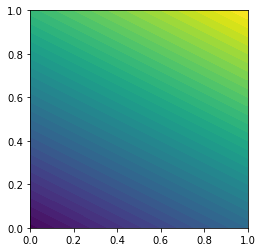

In [27]:
solve(F == 0, u, bc)
plot(u)